In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


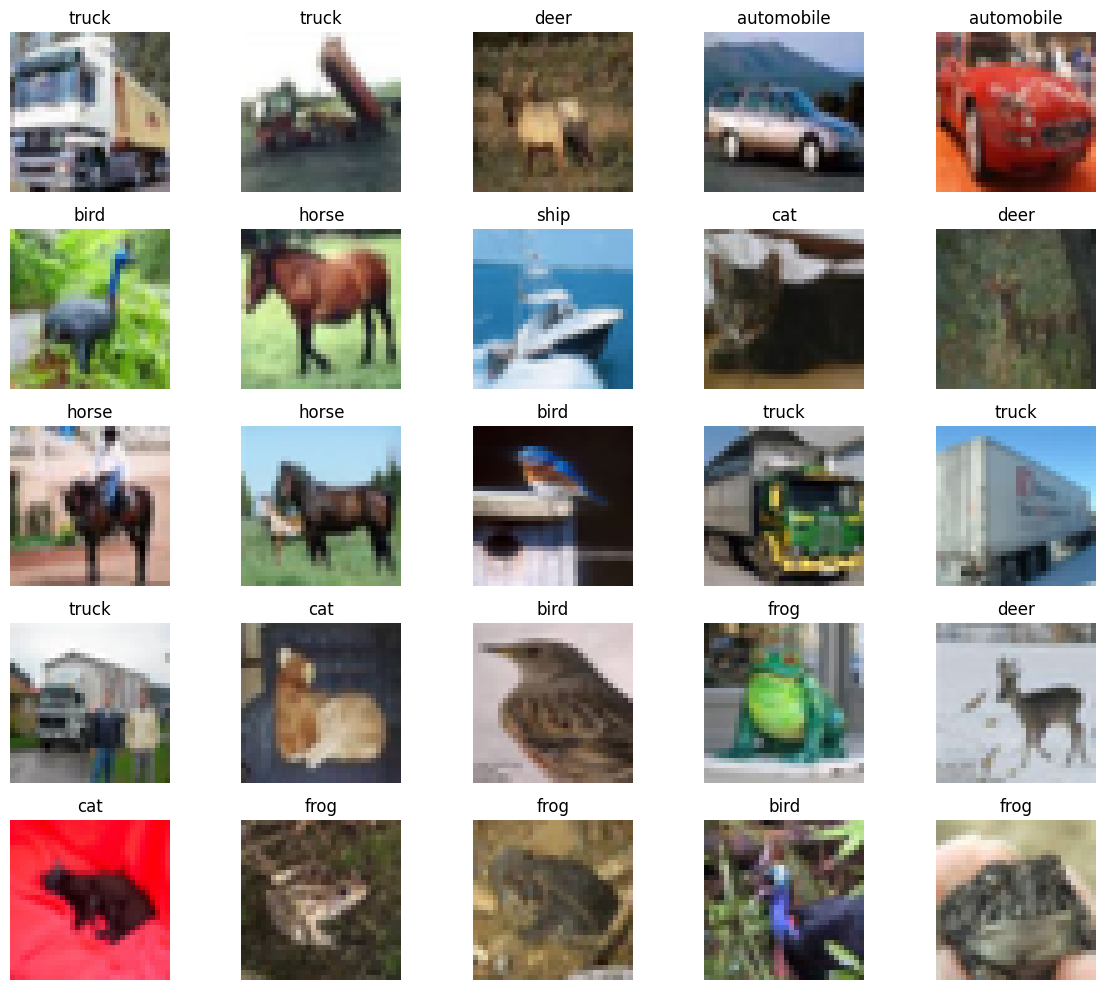

In [5]:
visualize_images(sample,(5,5))

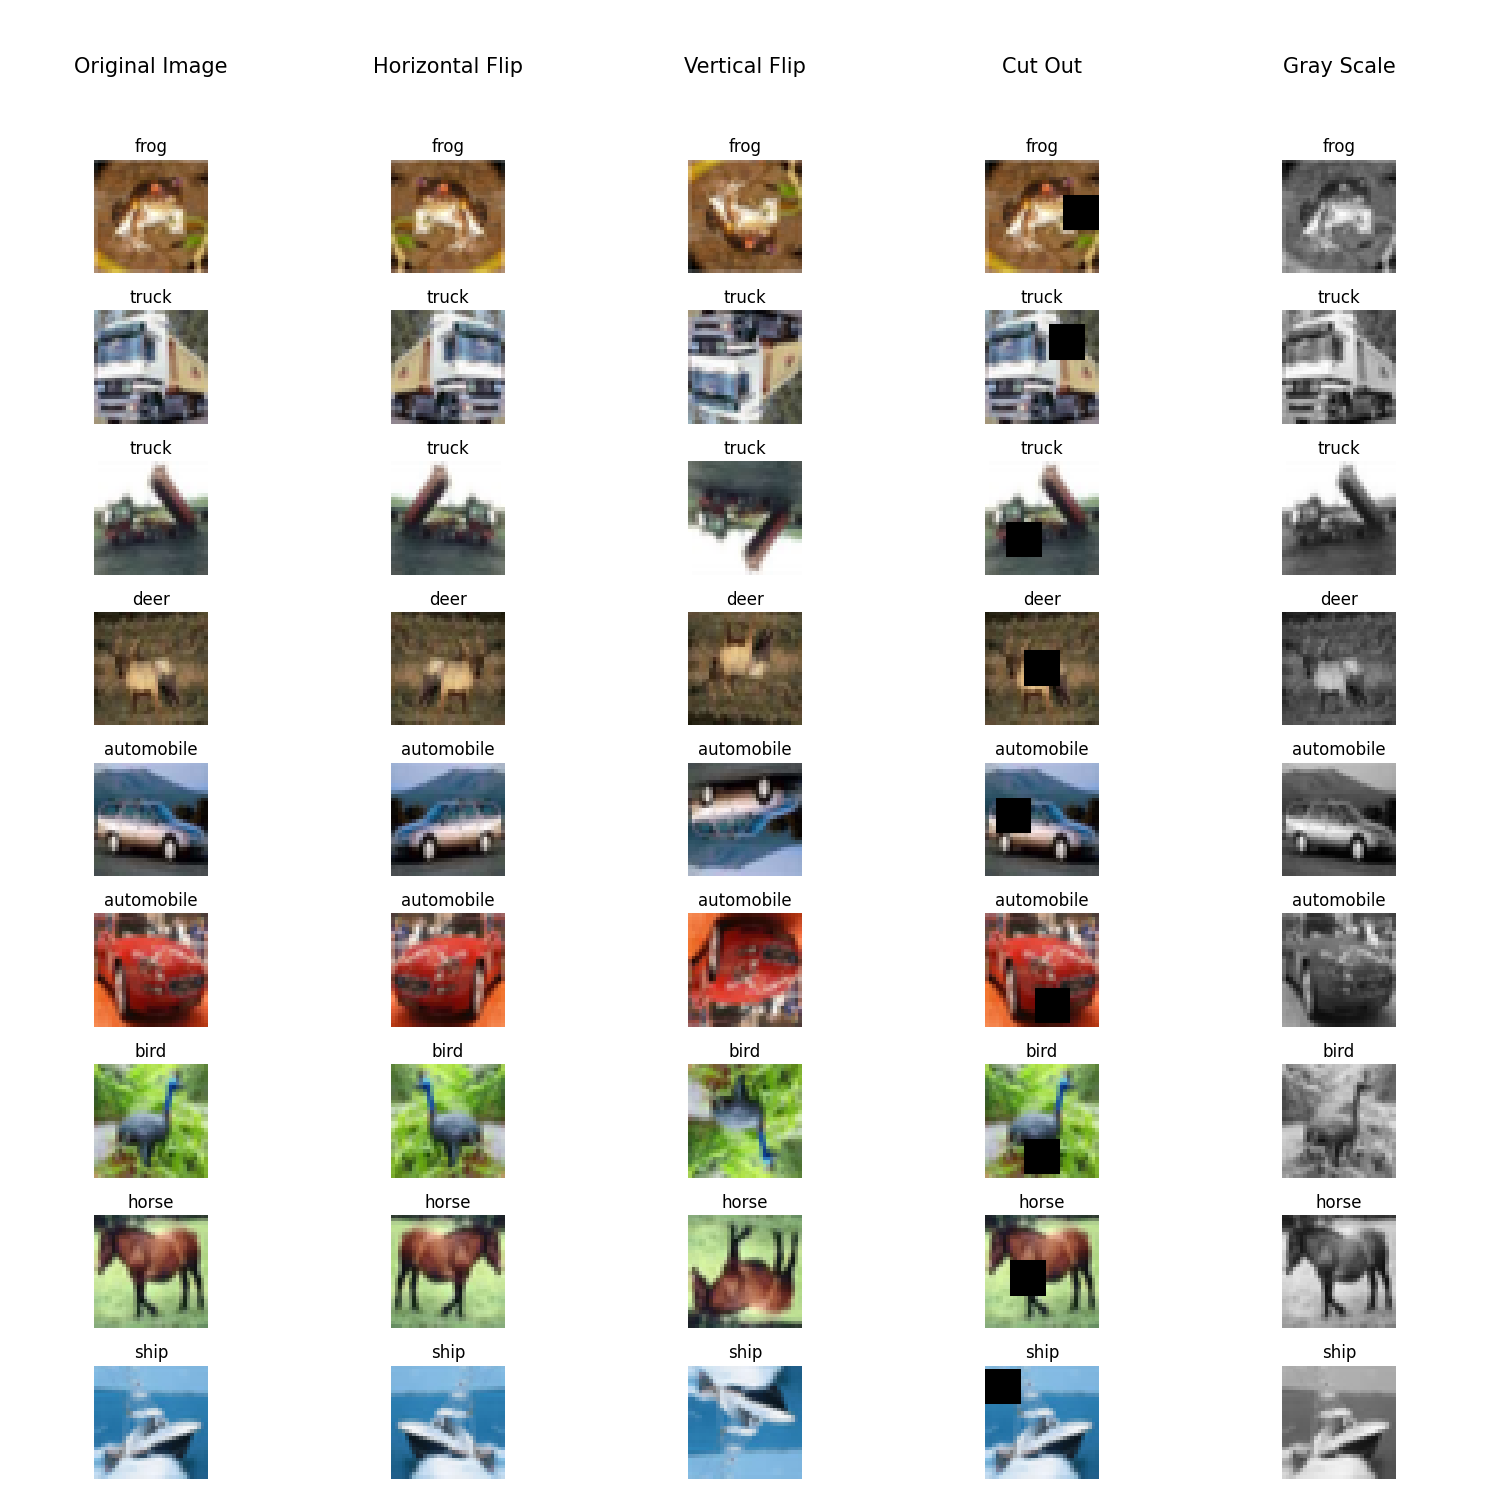

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="bn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
       BatchNorm2d-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
      BatchNorm2d-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.7016 Batch_id=1562 Accuracy=32.51: 100%|██████████| 1563/1563 [00:27<00:00, 55.90it/s]


Test set: Average loss: 1.4554, Accuracy: 4697/10000 (46.97%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.8531 Batch_id=1562 Accuracy=43.18: 100%|██████████| 1563/1563 [00:28<00:00, 55.67it/s]


Test set: Average loss: 1.2443, Accuracy: 5498/10000 (54.98%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.2400 Batch_id=1562 Accuracy=48.19: 100%|██████████| 1563/1563 [00:28<00:00, 55.53it/s]


Test set: Average loss: 1.1496, Accuracy: 5879/10000 (58.79%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.4651 Batch_id=1562 Accuracy=50.78: 100%|██████████| 1563/1563 [00:28<00:00, 55.51it/s]


Test set: Average loss: 1.0704, Accuracy: 6206/10000 (62.06%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.0767 Batch_id=1562 Accuracy=52.78: 100%|██████████| 1563/1563 [00:27<00:00, 56.04it/s]


Test set: Average loss: 0.9875, Accuracy: 6491/10000 (64.91%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.3446 Batch_id=1562 Accuracy=54.68: 100%|██████████| 1563/1563 [00:28<00:00, 55.71it/s]


Test set: Average loss: 0.9385, Accuracy: 6669/10000 (66.69%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.3162 Batch_id=1562 Accuracy=56.40: 100%|██████████| 1563/1563 [00:27<00:00, 55.91it/s]


Test set: Average loss: 0.9345, Accuracy: 6723/10000 (67.23%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.3241 Batch_id=1562 Accuracy=57.16: 100%|██████████| 1563/1563 [00:28<00:00, 55.22it/s]


Test set: Average loss: 0.8900, Accuracy: 6916/10000 (69.16%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=0.8569 Batch_id=1562 Accuracy=58.21: 100%|██████████| 1563/1563 [00:27<00:00, 56.06it/s]


Test set: Average loss: 0.8626, Accuracy: 6995/10000 (69.95%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.4797 Batch_id=1562 Accuracy=58.82: 100%|██████████| 1563/1563 [00:28<00:00, 54.99it/s]


Test set: Average loss: 0.8440, Accuracy: 7057/10000 (70.57%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.3748 Batch_id=1562 Accuracy=59.33: 100%|██████████| 1563/1563 [00:28<00:00, 55.39it/s]


Test set: Average loss: 0.8240, Accuracy: 7152/10000 (71.52%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=0.8605 Batch_id=1562 Accuracy=59.89: 100%|██████████| 1563/1563 [00:28<00:00, 54.57it/s]


Test set: Average loss: 0.8099, Accuracy: 7233/10000 (72.33%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=1.6790 Batch_id=1562 Accuracy=60.53: 100%|██████████| 1563/1563 [00:28<00:00, 54.55it/s]


Test set: Average loss: 0.7986, Accuracy: 7237/10000 (72.37%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=0.6592 Batch_id=1562 Accuracy=60.73: 100%|██████████| 1563/1563 [00:28<00:00, 54.44it/s]


Test set: Average loss: 0.7837, Accuracy: 7315/10000 (73.15%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.6413 Batch_id=1562 Accuracy=61.03: 100%|██████████| 1563/1563 [00:27<00:00, 55.98it/s]


Test set: Average loss: 0.7737, Accuracy: 7323/10000 (73.23%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.4461 Batch_id=1562 Accuracy=61.59: 100%|██████████| 1563/1563 [00:28<00:00, 54.63it/s]


Test set: Average loss: 0.7720, Accuracy: 7309/10000 (73.09%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.0127 Batch_id=1562 Accuracy=61.94: 100%|██████████| 1563/1563 [00:27<00:00, 56.30it/s]


Test set: Average loss: 0.7590, Accuracy: 7401/10000 (74.01%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.0448 Batch_id=1562 Accuracy=62.25: 100%|██████████| 1563/1563 [00:28<00:00, 55.77it/s]


Test set: Average loss: 0.7470, Accuracy: 7394/10000 (73.94%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.0653 Batch_id=1562 Accuracy=62.86: 100%|██████████| 1563/1563 [00:27<00:00, 55.84it/s]


Test set: Average loss: 0.7684, Accuracy: 7334/10000 (73.34%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.1603 Batch_id=1562 Accuracy=62.72: 100%|██████████| 1563/1563 [00:28<00:00, 55.17it/s]


Test set: Average loss: 0.7442, Accuracy: 7434/10000 (74.34%)

Adjusting learning rate of group 0 to 6.0016e-04.


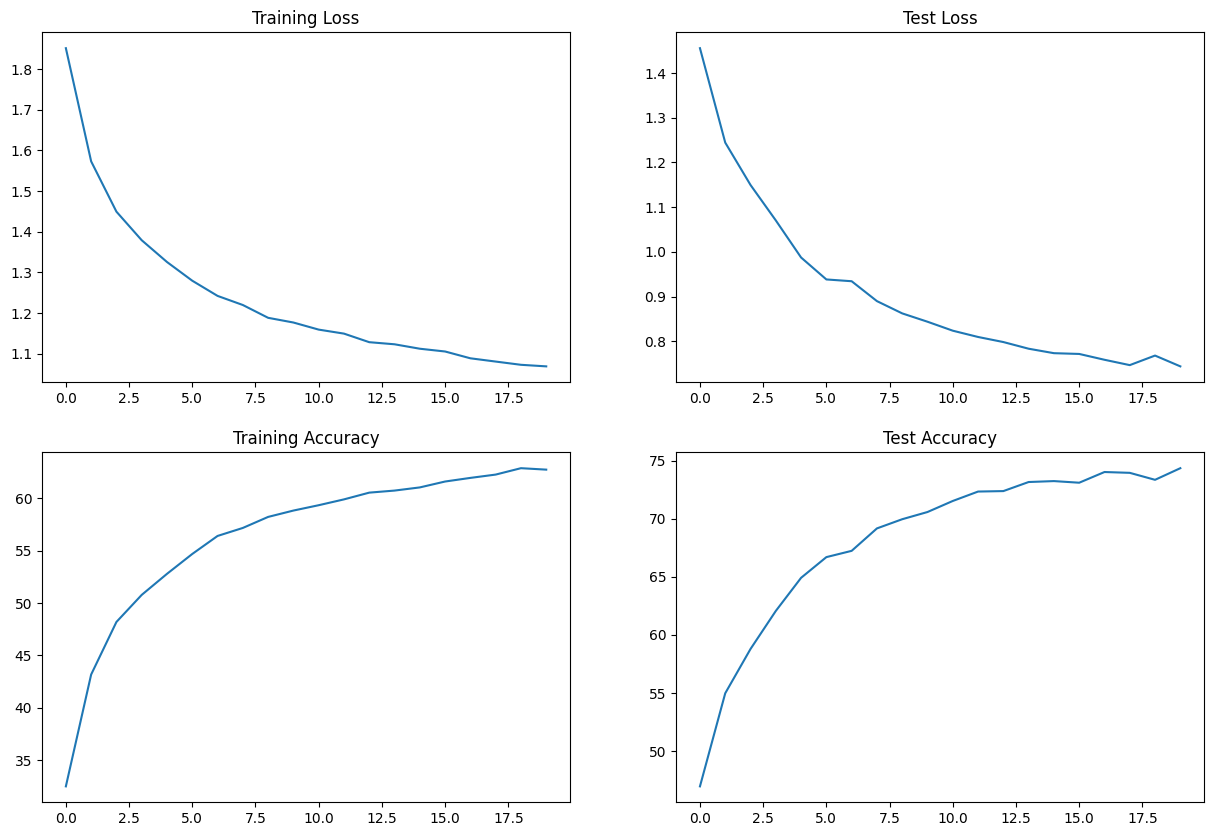

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

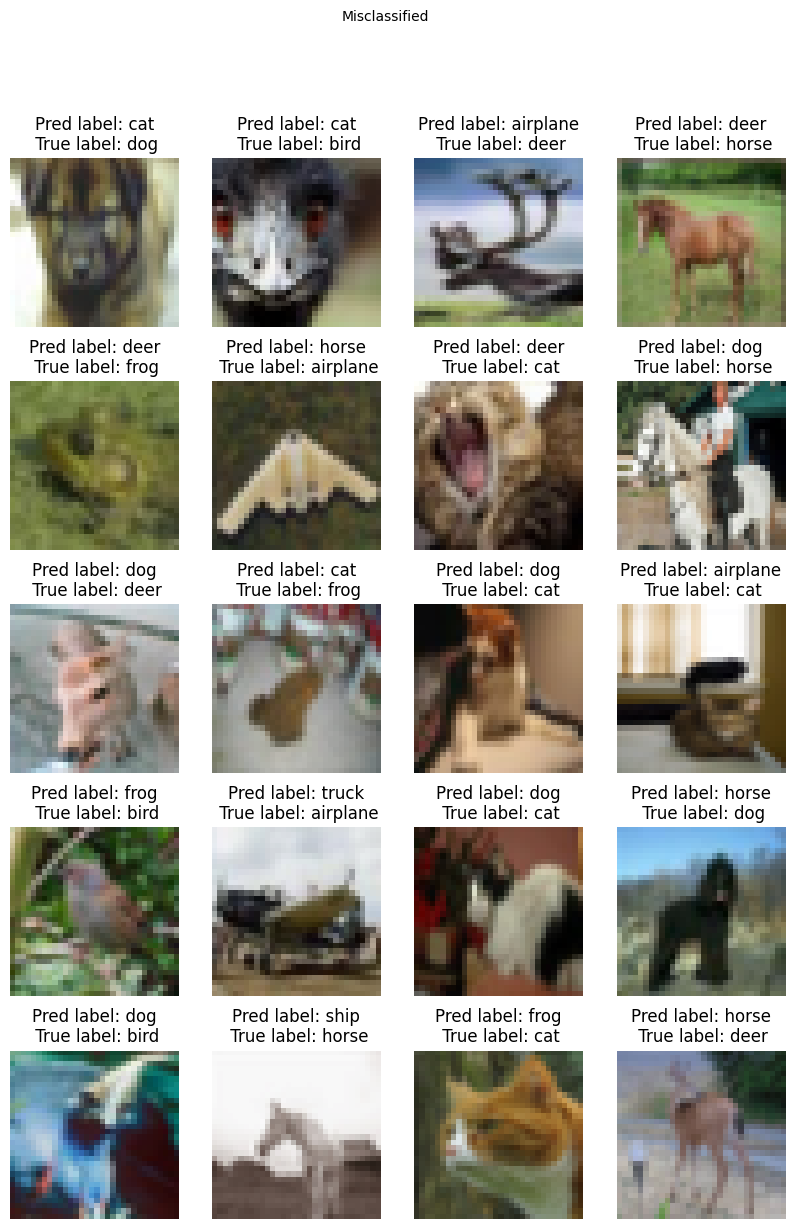

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 75 %

Accuracy of automobile : 91 %

Accuracy of  bird : 52 %

Accuracy of   cat : 51 %

Accuracy of  deer : 71 %

Accuracy of   dog : 67 %

Accuracy of  frog : 82 %

Accuracy of horse : 82 %

Accuracy of  ship : 85 %

Accuracy of truck : 86 %
{'airplane': 75.49668874172185, 'automobile': 91.30434782608695, 'bird': 52.976190476190474, 'cat': 51.94805194805195, 'deer': 71.65109034267913, 'dog': 67.09265175718849, 'frog': 82.89473684210526, 'horse': 82.05128205128206, 'ship': 85.39682539682539, 'truck': 86.25}


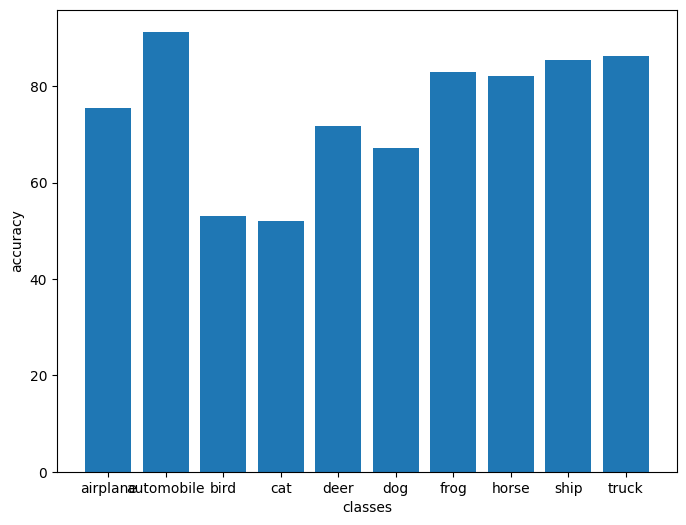

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)